## Symmetric Pairs


![Symmetric Pairs Question.png](<attachment:Symmetric Pairs Question.png>)
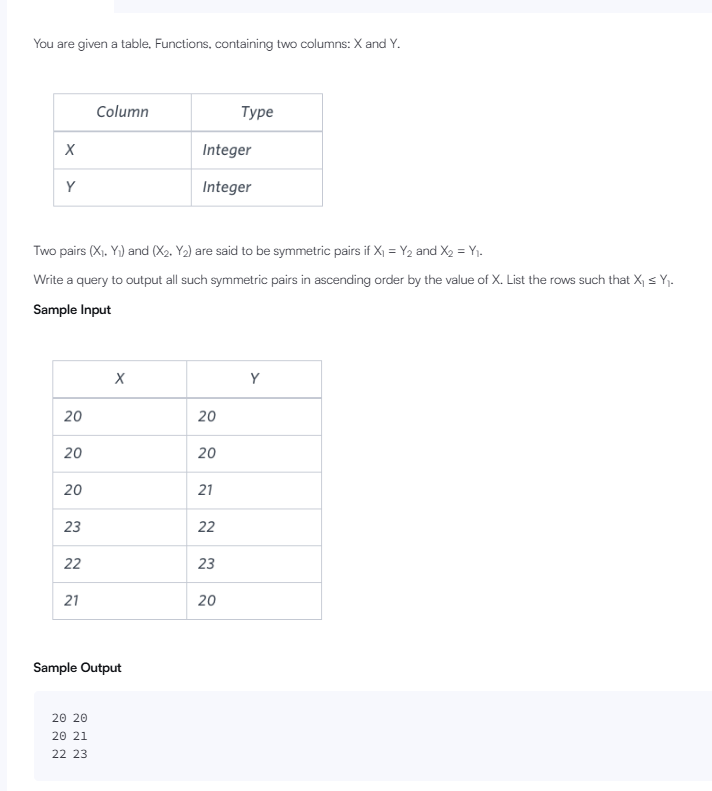

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StructField, StructType, IntegerType
from pyspark.sql.window import Window

In [0]:
spark = SparkSession.builder.appName('Symmetric Pairs').getOrCreate()

In [0]:
functions_schema = StructType([StructField('X', IntegerType(), False),
                               StructField('Y', IntegerType(), False)])

In [0]:
functions_df = spark.read.csv('dbfs:/FileStore/HackerRank/Functions.csv', schema=functions_schema, header=True)
display(functions_df.limit(15))

X,Y
86,86
27,27
45,45
95,95
11,11
18,8
85,85
2,2
77,77
91,91


In [0]:
functions_df.createOrReplaceTempView('functions_v')

## Question
You are given a table, Functions, containing two columns: X and Y.

Two pairs (X1, Y1) and (X2, Y2) are said to be symmetric pairs if X1 = Y2 and X2 = Y1.

Write a query to output all such symmetric pairs in ascending order by the value of X. List the rows such that X1 ≤ Y1.

## SQL Solution

In [0]:
%sql
with CTE as 
(
select x as X1, y as Y1, row_number() over (order by X, Y) rn from functions_v
)
select X1, Y1 from CTE f1 where exists(select 1 from CTE as f2 where f1.rn < f2.rn and f1.X1=f2.Y1 and f1.Y1=f2.X1)
order by X1

X1,Y1
2,24
4,22
5,21
6,20
8,18
9,17
11,15
13,13


## Pyspark Solution

In [0]:
functions_sub = functions_df.withColumn('rn', F.row_number().over(Window.orderBy(F.col('X'), F.col('Y'))))

results_df = functions_sub.alias('f1')\
    .join(functions_sub.alias('f2'),\
        ((F.col('f1.rn') < F.col('f2.rn')) & \
            (F.col('f1.X')==F.col('f2.Y')) & \
                (F.col('f1.Y')==F.col('f2.X'))),\
            how="inner")\
                .orderBy(F.col('f1.X'))\
                    .select(F.col('f1.X'), F.col('f1.Y'))

display(results_df)

X,Y
2,24
4,22
5,21
6,20
8,18
9,17
11,15
13,13
